In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

## Avoid printing out warnings

with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     boston = load_boston()
     X, y = load_boston(return_X_y=True)

# Data Exploration

In [2]:
X.shape

(506, 13)

The Boston Housing Dataset consists of 506 examples, each with 13 features.

In [3]:
feature_names = boston.feature_names

# Computing mean and standard deviation for each feature
mean_features = np.mean(X, axis = 0)
std_features = np.std(X, axis = 0)

print(f"{'Feature Name':<18} || {'Datatype':<10} || {'Mean':<14} || {'Standard Deviation'}")
print("-" * 73)

for i, feature in enumerate(feature_names):
    dtype_str = str(X[:, i].dtype)  # Convert dtype to string
    print(f"{feature:<18} || {dtype_str:<10} || {mean_features[i]:<14.3f} || {std_features[i]:.3f}")

Feature Name       || Datatype   || Mean           || Standard Deviation
-------------------------------------------------------------------------
CRIM               || float64    || 3.614          || 8.593
ZN                 || float64    || 11.364         || 23.299
INDUS              || float64    || 11.137         || 6.854
CHAS               || float64    || 0.069          || 0.254
NOX                || float64    || 0.555          || 0.116
RM                 || float64    || 6.285          || 0.702
AGE                || float64    || 68.575         || 28.121
DIS                || float64    || 3.795          || 2.104
RAD                || float64    || 9.549          || 8.699
TAX                || float64    || 408.237        || 168.370
PTRATIO            || float64    || 18.456         || 2.163
B                  || float64    || 356.674        || 91.205
LSTAT              || float64    || 12.653         || 7.134


Clearly, all the features consist of numeric (float) data.

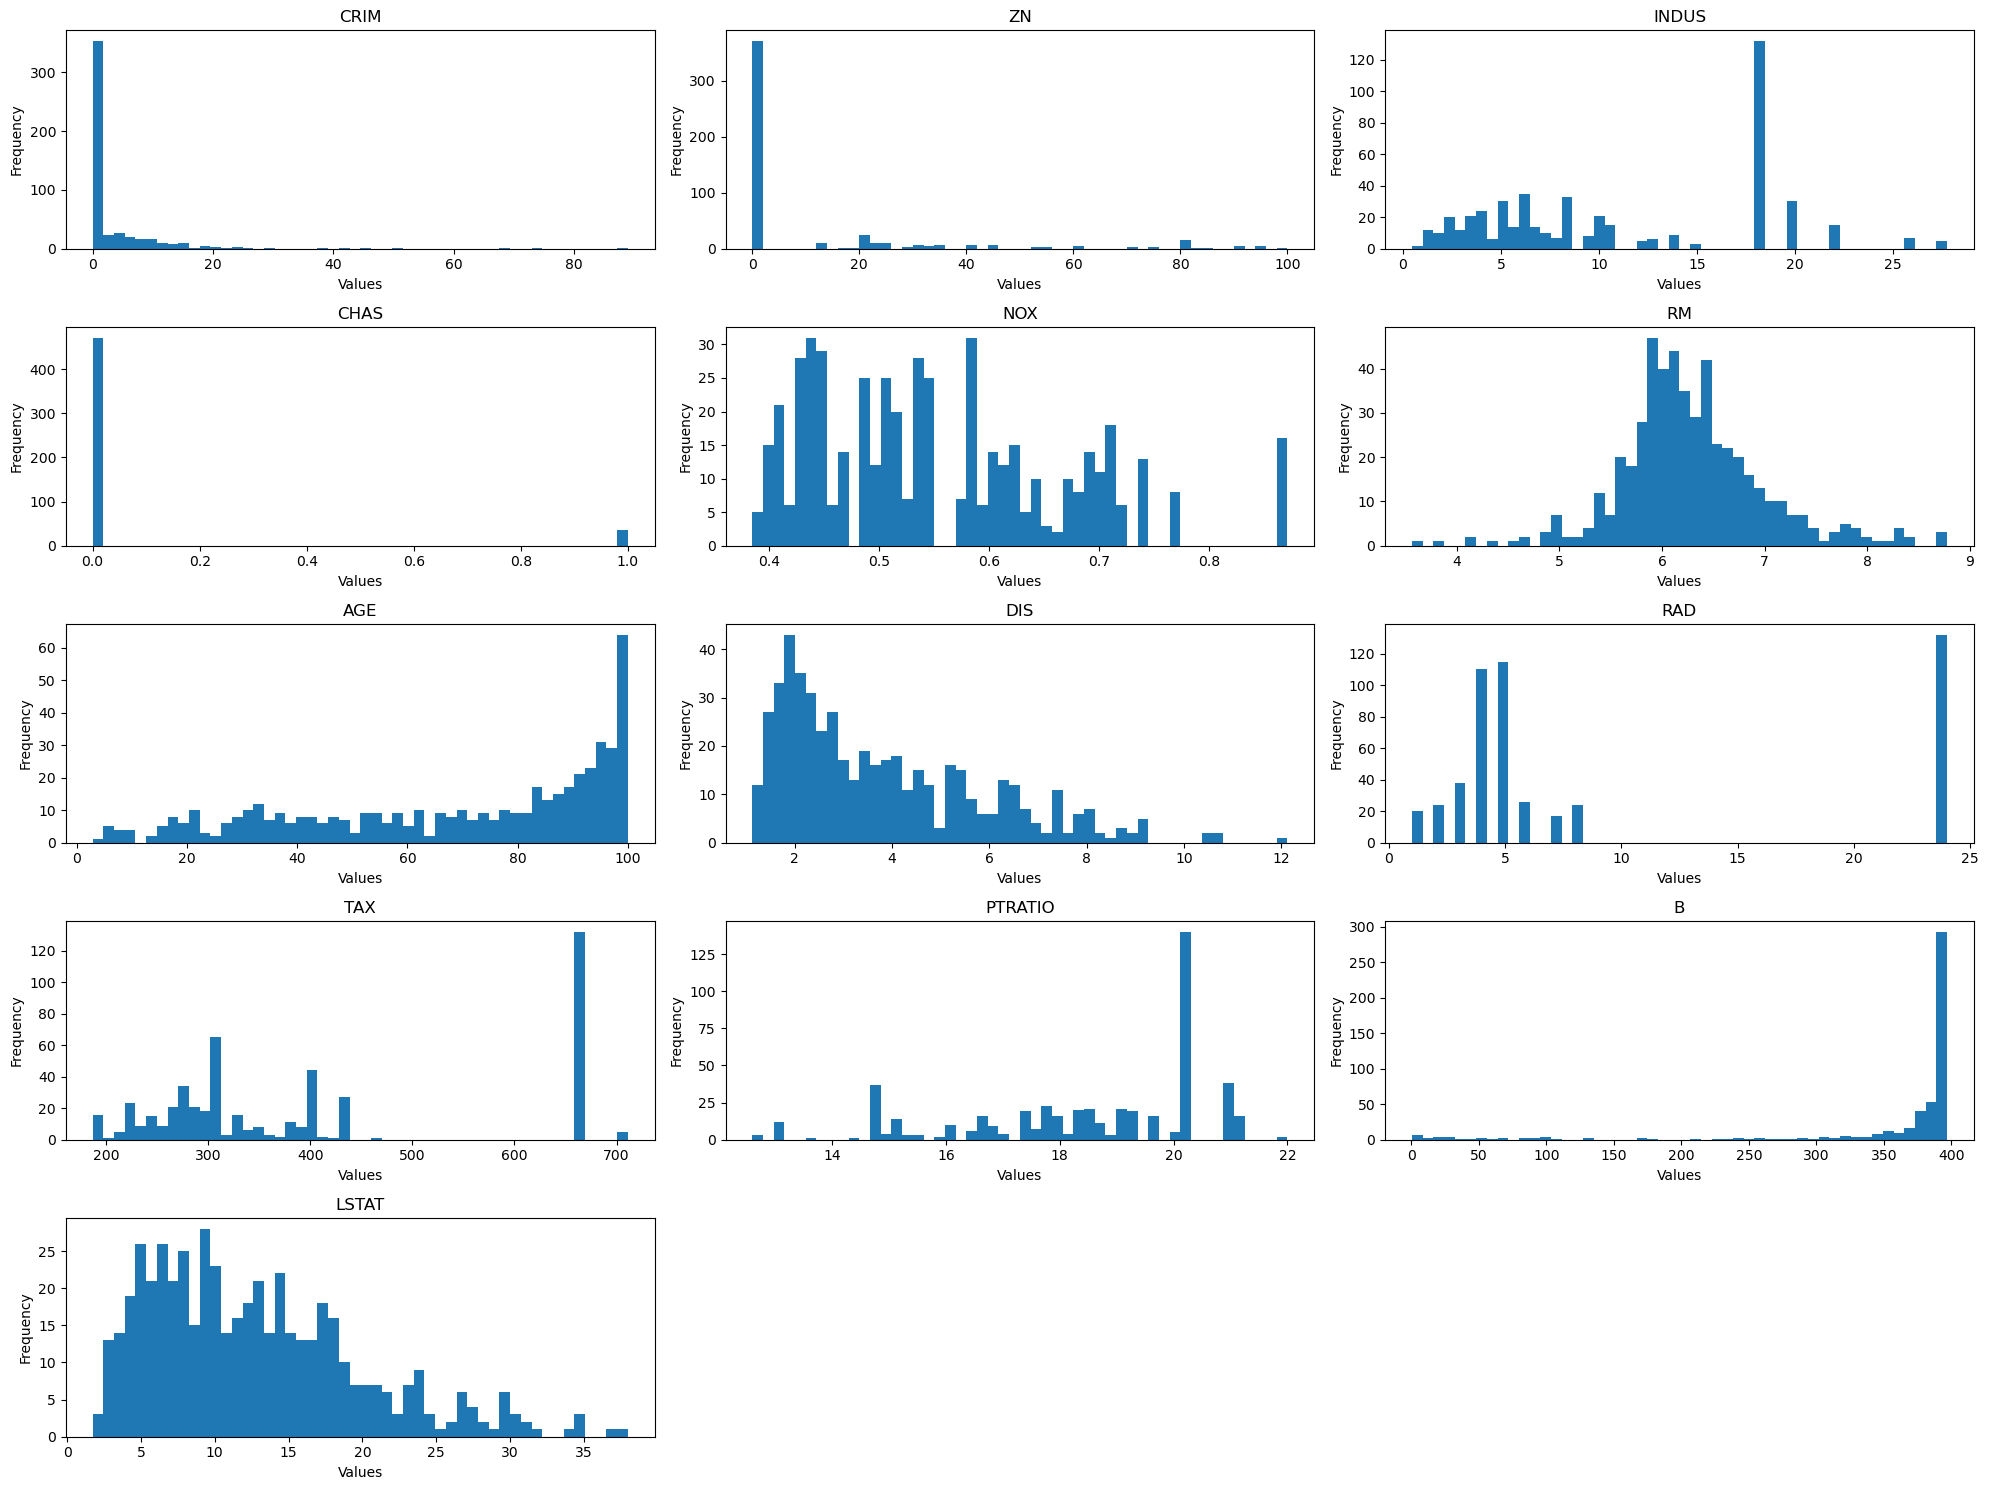

In [4]:
plt.figure(figsize = (20,15))
n = len(feature_names)

for i, feature in enumerate(feature_names):
    plt.subplot((n // 3) + 1, 3, i + 1)
    plt.hist(X[:, i], bins = 50)
    plt.title(feature)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Implementing Normal Equation Solution

In [5]:
kf = KFold(n_splits = 10)
train_mse = []
test_mse = []

for train_index, test_index in kf.split(X):
    # Splitting the dataset into train set and test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m_train, m_test = X_train.shape[0], X_test.shape[0]

    # Appending a column of ones to X_train and X_test to account for the bias term 
    X_train = np.append(X_train, np.ones((m_train,1)), axis = 1)
    X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)

    # Reshaping y_train and y_test as these must be column vectors
    y_train = y_train.reshape(m_train,1)
    y_test = y_test.reshape(m_test,1)

    # Computing theta using the Normal Equation (Closed-Form Solution)
    theta = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

    # Evaluating the model on the train set
    y_train_hat = X_train.dot(theta)
    mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)

    # Evaluating the model on the test set
    y_test_hat = X_test.dot(theta)
    mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)

    # Storing the results
    train_mse.append(mse_train)
    test_mse.append(mse_test)

avg_train_mse = np.mean(train_mse)
avg_test_mse = np.mean(test_mse)

print("Average Training MSE:", avg_train_mse)
print("Average Test MSE:", avg_test_mse)


Average Training MSE: 21.39939241710581
Average Test MSE: 34.705255944527316


# Implementing a Ridge Regression Model

In [6]:
kf = KFold(n_splits = 10)
lambda_vals = np.logspace(1,7,num=13)
best_lambda = None
lowest_test_j = float('inf')

for lam_val in lambda_vals:
    j_train = []
    j_test = []
    
    for train_index, test_index in kf.split(X):
        # Splitting the dataset into train set and test set
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        m_train, m_test = X_train.shape[0], X_test.shape[0]
    
        # Appending a column of ones to X_train and X_test to account for the bias term 
        X_train = np.append(X_train, np.ones((m_train,1)), axis = 1)
        X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)
    
        # Reshaping y_train and y_test
        y_train = y_train.reshape(m_train,1)
        y_test = y_test.reshape(m_test,1)

        # Creating identity matrix for regularization
        I = np.eye(X_train.shape[1])
        I[-1, -1] = 0 # This is done as the bias term should not be regulaized
    
        # Computing Theta using the Normal Equation (Closed-Form Solution)
        theta = np.dot(np.linalg.inv((np.dot(X_train.T, X_train)) + lam_val*I), np.dot(X_train.T, y_train))
    
        # Evaluating the model on the train set
        y_train_hat = X_train.dot(theta)
        mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
        j_train.append(mse_train + lam_val*0.5*np.sum(theta**2))
    
        # Evaluating the model on the test set
        y_test_hat = X_test.dot(theta)
        mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
        j_test .append(mse_test)

    avg_j_train = np.mean(j_train)
    avg_j_test = np.mean(j_test)

    if avg_j_test < lowest_test_j:
        lowest_test_j = avg_j_test
        best_lambda = lam_val

print("The best λ value is: ", best_lambda)
print("The corresponding test error is: ", lowest_test_j)

The best λ value is:  100.0
The corresponding test error is:  29.61522009733349


# Estimaing the Performace of Model with Optimal λ

In [26]:
kf = KFold(n_splits = 10)
train_mse = []
test_mse = []

for train_index, test_index in kf.split(X):
    # Splitting the dataset into train set and test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m_train, m_test = X_train.shape[0], X_test.shape[0]

    # Appending a column of ones to X_train and X_test to account for the bias term 
    X_train = np.append(X_train, np.ones((m_train,1)), axis = 1)
    X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)

    # Reshaping y_train and y_test
    y_train = y_train.reshape(m_train,1)
    y_test = y_test.reshape(m_test,1)

    # Creating identity matrix for regularization
    I = np.eye(X_train.shape[1])
    I[-1, -1] = 0 # This is done as the bias term should not be regulaized

    # Computing Theta using the Normal Equation (Closed-Form Solution)
    theta = np.dot(np.linalg.inv((np.dot(X_train.T, X_train)) + best_lambda*I), np.dot(X_train.T, y_train))

    # Evaluating the model on the train set
    y_train_hat = X_train.dot(theta)
    mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
    train_mse.append(mse_train)
    
    # Evaluating the model on the test set
    y_test_hat = X_test.dot(theta)
    mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
    test_mse.append(mse_test)

avg_train_mse = np.mean(train_mse)
avg_test_mse = np.mean(test_mse)

print("Average Training Score:", avg_train_mse)
print("Average Test Score:", avg_test_mse)


Average Training Score: 23.609927954689702
Average Test Score: 29.61522009733349


# Implementing a Polynomial Transformation of Degree 2

Without scaling - Training score 7.48, and test Score is 65.55 - if features have different scale, then creating polynomial features like square would create terms that differ by mahnitue of different orders leading to inaccurate soltuions. That is, featrues with larger magnitudes dominate the solution, and these with smaller ones might end up being negligible.

In [8]:
kf = KFold(n_splits = 10)
train_mse = []
test_mse = []

for train_index, test_index in kf.split(X):
    # Splitting the dataset into train set and test set
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m_train, m_test = X_train.shape[0], X_test.shape[0]

    # Polynomial Transformation
    poly = PolynomialFeatures(degree = 2, include_bias = False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Scale the polynomial features using training data statistics
    poly_mean = np.mean(X_train_poly, axis=0)
    poly_std = np.std(X_train_poly, axis=0)
    
    # Avoid division by zero
    poly_std[poly_std == 0] = 1
    
    X_train_poly = (X_train_poly - poly_mean) / poly_std
    X_test_poly = (X_test_poly - poly_mean) / poly_std

    # Appending a column of ones to X_train and X_test to account for the bias term 
    X_train_poly = np.append(X_train_poly, np.ones((m_train,1)), axis = 1)
    X_test_poly = np.append(X_test_poly, np.ones((m_test, 1)), axis=1)

    # Reshaping y_train and y_test
    y_train = y_train.reshape(m_train,1)
    y_test = y_test.reshape(m_test,1)

    # Creating identity matrix for regularization
    I = np.eye(X_train_poly.shape[1])
    I[-1, -1] = 0 # This is done as the bias term should not be regulaized

    # Computing Theta using the Normal Equation (Closed-Form Solution)
    theta = np.dot(np.linalg.inv((np.dot(X_train_poly.T, X_train_poly))+ best_lambda*I), np.dot(X_train_poly.T, y_train))

    # Evaluating the model on the train set
    y_train_hat = X_train_poly.dot(theta)
    mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
    train_mse.append(mse_train)
    
    # Evaluating the model on the test set
    y_test_hat = X_test_poly.dot(theta)
    mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
    test_mse.append(mse_test)

avg_train_mse = np.mean(train_mse)
avg_test_mse = np.mean(test_mse)

print("Average Training Score:", avg_train_mse)
print("Average Test Score:", avg_test_mse)


Average Training Score: 15.986238167513358
Average Test Score: 29.250744038179725


# Implementing Multivariate Linear Regression using the Gradient Descent method

In [9]:
kf = KFold(n_splits=10)
train_mse = []
test_mse = []

''' Since we are using gradient descent, we scale the features to have zero mean and a variance of 1. This is done to ensure that all 
    features contribute equally to the gradient descent updates, which helps the algorithm converge faster. Without scaling, features 
    with larger scales can dominate the gradient, potentially causing slow convergence or even divergence.'''

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

for train_index, test_index in kf.split(X):
    # Splitting the dataset into train set and test set
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m_train, m_test = X_train.shape[0], X_test.shape[0]

    # Appending a column of ones to X_train and X_test to account for the bias term
    X_train = np.append(X_train, np.ones((m_train, 1)), axis=1)
    X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)

    # Reshaping y_train and y_test
    y_train = y_train.reshape(m_train, 1)
    y_test = y_test.reshape(m_test, 1)

    # Hyperparameters
    eta = 0.01  
    n_iterations = 10_000
    tolerance = 1e-8

    # Random Initialization
    theta = np.random.randn(X_train.shape[1], 1)

    # Gradient Descent
    for i in range(n_iterations):
        gradients = (2/m_train) * X_train.T.dot(X_train.dot(theta) - y_train)
        theta = theta - eta * gradients

        if np.linalg.norm(gradients) < tolerance:
            break

    # Evaluating the model on the train set
    y_train_hat = X_train.dot(theta)
    mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
    train_mse.append(mse_train)
    
    # Evaluating the model on the test set
    y_test_hat = X_test.dot(theta)
    mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
    test_mse.append(mse_test)

# Calculating average MSE
avg_train_mse = np.mean(train_mse)
avg_test_mse = np.mean(test_mse)

print("Average Training MSE:", avg_train_mse)
print("Average Test MSE:", avg_test_mse)

Average Training MSE: 21.399392417680964
Average Test MSE: 34.70527545640787


# Implementing Lasso Regression

In [10]:
kf = KFold(n_splits=10)

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

alpha_values = np.logspace(-3,2,num=13)
best_alpha = None
lowest_test_g = float('inf')

for alp_val in alpha_values:
    g_train = []
    g_test = []
    
    for train_index, test_index in kf.split(X):
        # Splitting the dataset into train set and test set
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        m_train, m_test = X_train.shape[0], X_test.shape[0]
    
        # Appending a column of ones to X_train and X_test to account for the bias term
        X_train = np.append(X_train, np.ones((m_train, 1)), axis=1)
        X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)
    
        # Reshaping y_train and y_test
        y_train = y_train.reshape(m_train, 1)
        y_test = y_test.reshape(m_test, 1)
    
        # Hyperparameters
        eta = 0.01  
        n_iterations = 10_000
        tolerance = 1e-8
    
        # Random Initialization
        theta = np.random.randn(X_train.shape[1], 1)
    
        # Gradient Descent
        for i in range(n_iterations):
            # Computing the gradient of the mse term
            mse_gradient = (2/m_train) * X_train.T.dot(X_train.dot(theta) - y_train)

            
            subgradient = np.sign(theta)
            subgradient[-1] = 0 # This is done as the bias term should not be regulaized

            gradients = mse_gradient + alp_val * subgradient # Net gradient vector

            theta = theta - eta * gradients
    
            if np.linalg.norm(gradients) < tolerance:
                break
    
        # Evaluating the model on the train set
        y_train_hat = X_train.dot(theta)
        mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
        train_cost = mse_train + alp_val*np.sum(abs(theta)) # Does it matter if I include bias term or not
        g_train.append(train_cost)
        
        # Evaluating the model on the test set
        y_test_hat = X_test.dot(theta)
        mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
        g_test.append(mse_test)

    avg_g_train = np.mean(g_train)
    avg_g_test = np.mean(g_test)

    if avg_g_test < lowest_test_g:
        lowest_test_g = avg_g_test
        best_alpha = alp_val

print("The best alpha  value is: ", best_alpha)
print("The corresponding test error is: ", lowest_test_g)

The best alpha  value is:  0.31622776601683794
The corresponding test error is:  33.980907639491924


# Implement Elastic Net 

In [22]:
kf = KFold(n_splits=10)

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

alpha_values = np.logspace(-2, 2, num=13)
best_alpha = None
lowest_test_g = float('inf')

for alp_val in alpha_values:
    g_train = []
    g_test = []
    
    for train_index, test_index in kf.split(X):
        # Splitting the dataset into train set and test set
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        m_train, m_test = X_train.shape[0], X_test.shape[0]
    
        # Appending a column of ones to X_train and X_test to account for the bias term
        X_train = np.append(X_train, np.ones((m_train, 1)), axis=1)
        X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)
    
        # Reshaping y_train and y_test
        y_train = y_train.reshape(m_train, 1)
        y_test = y_test.reshape(m_test, 1)
    
        # Hyperparameters
        eta = 0.01  
        n_iterations = 10_000
        tolerance = 1e-8
        r = 0.5
    
        # Random Initialization
        theta = np.random.randn(X_train.shape[1], 1)
    
        # Gradient Descent
        for i in range(n_iterations):
            # Computing the gradient of the mse term
            mse_gradient = (2/m_train) * X_train.T.dot(X_train.dot(theta) - y_train)

            l1_subgradient = r * alp_val * np.sign(theta)
            l1_subgradient[-1] = 0   # This is done as the bias term should not be regulaized

            l2_subgradient = (1-r) * alp_val * theta
            l2_subgradient[-1] = 0   # This is done as the bias term should not be regulaized

            gradients = mse_gradient + l1_subgradient + l2_subgradient # Net gradient vector

            theta = theta - eta * gradients
    
            if np.linalg.norm(gradients) < tolerance:
                break
    
        # Evaluating the model on the train set
        y_train_hat = X_train.dot(theta)
        mse_train = (1/m_train) * np.sum((y_train_hat - y_train)**2)
        train_cost = mse_train + r*alp_val*np.sum(abs(theta)) + ((1-r)/2)*alp_val*np.sum(theta**2)
        g_train.append(train_cost)
        
        # Evaluating the model on the test set
        y_test_hat = X_test.dot(theta)
        mse_test = (1/m_test) * np.sum((y_test_hat - y_test)**2)
        g_test.append(mse_test)

    avg_g_train = np.mean(g_train)
    avg_g_test = np.mean(g_test)

    if avg_g_test < lowest_test_g:
        lowest_test_g = avg_g_test
        best_alpha = alp_val

print("The best alpha value is: ", best_alpha)
print("The corresponding test error is: ", lowest_test_g)

The best alpha value is:  0.46415888336127775
The corresponding test error is:  32.14424417240106


In [23]:
kf = KFold(n_splits=10)

# Scale features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

alpha = 0.46415888336127775

r_values = np.logspace(-3, -0.3, num=10)

best_r = None
lowest_test_g = float('inf')

for r_val in r_values:
    g_train = []
    g_test = []

    for train_index, test_index in kf.split(X_scaled):
        # Split the dataset
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        m_train, m_test = X_train.shape[0], X_test.shape[0]
    
        # Append a column of ones to X_train and X_test for the bias term
        X_train = np.append(X_train, np.ones((m_train, 1)), axis=1)
        X_test = np.append(X_test, np.ones((m_test, 1)), axis=1)
    
        y_train = y_train.reshape(m_train, 1)
        y_test = y_test.reshape(m_test, 1)
    
        # Hyperparameters
        eta = 0.01
        n_iterations = 10_000
        tolerance = 1e-8
    
        # Random initialization
        theta = np.random.randn(X_train.shape[1], 1)
    
        # Gradient Descent
        for i in range(n_iterations):
            # MSE gradient
            mse_gradient = (2 / m_train) * X_train.T.dot(X_train.dot(theta) - y_train)

            # L1 subgradient (exclude bias term)
            l1_subgradient = r_val * alpha * np.sign(theta)
            l1_subgradient[-1] = 0   # do not regularize bias

            # L2 subgradient (exclude bias term)
            l2_subgradient = (1 - r_val) * alpha * theta
            l2_subgradient[-1] = 0  # do not regularize bias

            # Net gradient
            gradients = mse_gradient + l1_subgradient + l2_subgradient

            # Parameter update
            theta = theta - eta * gradients
    
            if np.linalg.norm(gradients) < tolerance:
                break
    
        # Training cost = MSE + L1 penalty + L2 penalty
        y_train_hat = X_train.dot(theta)
        mse_train = np.mean((y_train_hat - y_train) ** 2)
        l1_term = r_val * alpha * np.sum(np.abs(theta[:-1]))      # exclude bias
        l2_term = (1 - r_val) * alpha * 0.5 * np.sum(theta[:-1]**2)
        train_cost = mse_train + l1_term + l2_term
        g_train.append(train_cost)
        
        # Testing metric (just the MSE for the test set)
        y_test_hat = X_test.dot(theta)
        mse_test = np.mean((y_test_hat - y_test) ** 2)
        g_test.append(mse_test)

    avg_g_train = np.mean(g_train)
    avg_g_test = np.mean(g_test)

    if avg_g_test < lowest_test_g:
        lowest_test_g = avg_g_test
        best_r = r_val

print("Fixed alpha =", alpha)
print("Best r value =", best_r)
print("Corresponding average test MSE =", lowest_test_g)


Fixed alpha = 0.46415888336127775
Best r value = 0.001
Corresponding average test MSE = 31.176099041010268
